# Title

## Descriptions

lorem...

In [122]:
import os
import pandas as pd

In [123]:
def laod_worldbank_data(data_path="", filename="", header=0):
    try:
        csv_path=os.path.join(data_path, filename)
        return pd.read_csv(csv_path, header=header)
#         return data #years as columns=data_year_as_column, countries as column = data_country_as_column
    except Exception as e:
        print("Error while loading data:", e)
        return


#### Data Preprocessing

In [124]:
# Load dataset
filename="dataset.csv"
path="data"
header=2
row_data = laod_worldbank_data(path, filename, header)
row_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,NaN,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,...,44351.000000,44666.000000,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000,NaN,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.544810,...,0.660561,0.707733,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631,NaN,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,...,103165.000000,103776.000000,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000,NaN,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017,NaN,NaN


In [125]:
# choose they year which has lots of data

def get_year_with_more_data(data):
    """ use the year with more than half of the data """

    def get_counts(year):
        year = data[year].describe()
        return year["count"]
    
    limit_number_data = data.shape[0]/2
    unwanted_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66']
    row_columns = data.columns
    years = [column for column in row_columns if column not in unwanted_columns ]
    # list of number of non null items per year     
    return [year for year in years if get_counts(year) >= limit_number_data]

years = get_year_with_more_data(row_data)
years

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In [126]:
# filter our row data
features = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + years
data = row_data[features]
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.319000,50.304000,49.998000,49.588000,49.17700,48.767000,...,44.875000,44.511000,44.147000,43.783000,43.421000,43.059000,42.940000,42.957000,42.990000,43.041000
1,Aruba,ABW,Urban population,SP.URB.TOTL,31274.000000,32508.000000,34119.000000,35949.000000,37721.00000,39172.000000,...,44888.000000,44880.000000,44688.000000,44379.000000,44051.000000,43776.000000,43820.000000,44059.000000,44351.000000,44666.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,1.784062,3.869913,4.836820,5.224685,4.81157,3.774524,...,0.482359,-0.017824,-0.428725,-0.693862,-0.741833,-0.626233,0.100461,0.543931,0.660561,0.707733
3,Aruba,ABW,"Population, total",SP.POP.TOTL,62152.000000,64623.000000,68240.000000,72495.000000,76705.00000,80324.000000,...,100028.000000,100830.000000,101226.000000,101362.000000,101452.000000,101665.000000,102050.000000,102565.000000,103165.000000,103776.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1.816830,3.898739,5.446052,6.048669,5.64493,4.610156,...,1.291950,0.798578,0.391971,0.134263,0.088751,0.209731,0.377979,0.503385,0.583290,0.590508


In [127]:
# filter our row data
features = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
all_features = features + years
data = row_data[all_features]
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.319000,50.304000,49.998000,49.588000,49.17700,48.767000,...,44.875000,44.511000,44.147000,43.783000,43.421000,43.059000,42.940000,42.957000,42.990000,43.041000
1,Aruba,ABW,Urban population,SP.URB.TOTL,31274.000000,32508.000000,34119.000000,35949.000000,37721.00000,39172.000000,...,44888.000000,44880.000000,44688.000000,44379.000000,44051.000000,43776.000000,43820.000000,44059.000000,44351.000000,44666.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,1.784062,3.869913,4.836820,5.224685,4.81157,3.774524,...,0.482359,-0.017824,-0.428725,-0.693862,-0.741833,-0.626233,0.100461,0.543931,0.660561,0.707733
3,Aruba,ABW,"Population, total",SP.POP.TOTL,62152.000000,64623.000000,68240.000000,72495.000000,76705.00000,80324.000000,...,100028.000000,100830.000000,101226.000000,101362.000000,101452.000000,101665.000000,102050.000000,102565.000000,103165.000000,103776.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1.816830,3.898739,5.446052,6.048669,5.64493,4.610156,...,1.291950,0.798578,0.391971,0.134263,0.088751,0.209731,0.377979,0.503385,0.583290,0.590508


In [129]:
# get data with countries as columns

year_as_column = data

country_as_column = data.transpose()

country_as_column.head()

,0,1,2,3,4,5,6,7,8,9,...,20206,20207,20208,20209,20210,20211,20212,20213,20214,20215
Country Name,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
Country Code,ABW,ABW,ABW,ABW,ABW,ABW,ABW,ABW,ABW,ABW,...,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE
Indicator Name,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 P...,"Prevalence of underweight, weight for age (% o...","Community health workers (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)","Primary completion rate, total (% of relevant ...",...,Forest area (% of land area),Forest area (sq. km),Land area where elevation is below 5 meters (%...,Urban land area where elevation is below 5 met...,Urban land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km)
Indicator Code,SP.URB.TOTL.IN.ZS,SP.URB.TOTL,SP.URB.GROW,SP.POP.TOTL,SP.POP.GROW,SI.POV.DDAY,SH.STA.MALN.ZS,SH.MED.CMHW.P3,SH.DYN.MORT,SE.PRM.CMPT.ZS,...,AG.LND.FRST.ZS,AG.LND.FRST.K2,AG.LND.EL5M.ZS,AG.LND.EL5M.UR.ZS,AG.LND.EL5M.UR.K2,AG.LND.EL5M.RU.ZS,AG.LND.EL5M.RU.K2,AG.LND.ARBL.ZS,AG.LND.AGRI.ZS,AG.LND.AGRI.K2
1990,50.319,31274.0,1.784062,62152.0,1.81683,NaN,NaN,NaN,NaN,NaN,...,48.666615,188266.8,NaN,NaN,NaN,NaN,NaN,7.522295,33.630606,130100.0


In [130]:
# We're considering the CO2 emissions (kg per 2015 US$ of GDP) indicator
data_co2 = data[data['Indicator Code']=='EN.ATM.CO2E.KD.GD']

In [131]:
data_co2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
      dtype='object')

In [132]:
df = data_co2.columns[4:].to_list()
attributes = data_co2.columns[:4].to_list() + ['value']

In [133]:
attributes

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'value']

In [134]:
data_year_index = pd.DataFrame()

In [135]:
len(data['Country Name'].unique())

266

In [136]:
data_co2.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

/Users/diracmurairi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
data_co2

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
45,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,Africa Eastern and Southern,0.812629,0.799510,0.809146,0.837308,0.837694,0.848764,0.829158,0.841281,0.846616,...,0.818972,0.778735,0.761117,0.773236,0.736211,0.737874,0.695976,0.704773,0.697648,0.692478
197,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.177625,0.199433,0.213139,0.381502,0.429535,0.542729,0.764199,0.577706,0.445506,0.398016
273,Africa Western and Central,0.350653,0.383926,0.417678,0.435745,0.426181,0.424495,0.433772,0.413319,0.387462,...,0.350681,0.327920,0.310823,0.300885,0.261544,0.279136,0.287386,0.277027,0.276034,0.269391
349,Angola,0.178156,0.181981,0.188528,0.268645,0.257026,0.360140,0.335717,0.321729,0.297881,...,0.290998,0.291387,0.295161,0.283486,0.304271,0.306250,0.305621,0.289120,0.298875,0.300849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19881,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19957,"Yemen, Rep.",0.277614,0.334337,0.331878,0.283807,0.277721,0.305901,0.298571,0.305403,0.311464,...,0.380028,0.368920,0.379441,0.390576,0.438227,0.380555,0.376016,0.349302,0.446168,0.453118
20033,South Africa,1.463442,1.446677,1.456857,1.484962,1.471499,1.496235,1.487709,1.529077,1.561439,...,1.544351,1.469836,1.458787,1.519319,1.461515,1.492441,1.390634,1.419016,1.417573,1.427262
20109,Zambia,0.400535,0.421153,0.424107,0.351132,0.326331,0.315660,0.245557,0.306421,0.292766,...,0.210329,0.185560,0.155544,0.158903,0.164842,0.159737,0.175390,0.214145,0.214992,0.232466


In [141]:
data_co2.transpose().reset_index()

,index,45,121,197,273,349,425,501,577,653,...,19501,19577,19653,19729,19805,19881,19957,20033,20109,20185
0,Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1,1990,NaN,0.812629,NaN,0.350653,0.178156,1.145952,0.250301,0.705115,0.458571,...,NaN,0.499685,0.180872,0.576367,0.245112,NaN,0.277614,1.463442,0.400535,0.97571
2,1991,NaN,0.79951,NaN,0.383926,0.181981,1.081268,0.244086,0.719127,0.504723,...,NaN,0.469014,0.175353,0.573336,0.250882,NaN,0.334337,1.446677,0.421153,1.023566
3,1992,NaN,0.809146,NaN,0.417678,0.188528,0.634938,0.241839,0.708525,0.473616,...,NaN,0.455267,0.146514,0.5602,0.274238,NaN,0.331878,1.456857,0.424107,1.135441
4,1993,NaN,0.837308,NaN,0.435745,0.268645,0.535555,0.24436,0.735283,0.487401,...,NaN,0.529029,0.145445,0.553808,0.263437,NaN,0.283807,1.484962,0.351132,1.039066
5,1994,NaN,0.837694,NaN,0.426181,0.257026,0.511219,0.238672,0.75045,0.501003,...,NaN,0.536175,0.133336,0.539014,0.270308,NaN,0.277721,1.471499,0.326331,0.888844
6,1995,NaN,0.848764,NaN,0.424495,0.36014,0.411067,0.243597,0.75079,0.49951,...,NaN,0.554801,0.154012,0.537759,0.253398,NaN,0.305901,1.496235,0.31566,0.860751
7,1996,NaN,0.829158,NaN,0.433772,0.335717,0.380644,0.2436,0.742571,0.492738,...,NaN,0.571839,0.193512,0.529988,0.256127,NaN,0.298571,1.487709,0.245557,0.748706
8,1997,NaN,0.841281,NaN,0.413319,0.321729,0.321022,0.233274,0.732197,0.489318,...,NaN,0.621114,0.184461,0.518464,0.254489,NaN,0.305403,1.529077,0.306421,0.678619
9,1998,NaN,0.846616,NaN,0.387462,0.297881,0.358754,0.235672,0.700447,0.50227,...,NaN,0.656463,0.162058,0.506866,0.268179,NaN,0.311464,1.561439,0.292766,0.671035


In [140]:
data_frames = {}

def generate_dataframe(data, year):
    """ takes data and return indicators as columns """
    #     data = pd.pivot_table(data, indexes=)
    
    return 

    
for year in years:
    features = ["Country Name", year]
    data_frames["data_" + year] = data_co2[features]

test_data = data_frames["data_2014"]
test_data.head()

,Country Name,2014
45,Aruba,NaN
121,Africa Eastern and Southern,0.692478
197,Afghanistan,0.398016
273,Africa Western and Central,0.269391
349,Angola,0.300849


In [173]:
# use data for 2014
df = data_frames["data_2014"]
df.head()

,Country Name,2014
45,Aruba,NaN
121,Africa Eastern and Southern,0.692478
197,Afghanistan,0.398016
273,Africa Western and Central,0.269391
349,Angola,0.300849


In [243]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

def cluster_data_with_kmeans(my_data, nbr_clusters):
    # remove NaN datas
    my_data = my_data.dropna()
    df2 = pd.DataFrame(my_data)
    # select feature: Co2 2015
    X = df2["2014"]
    # normalize data: We do have one 1D array and we do not need to normalize the data
    # cluster
    X = np.array(X)
    X = X.reshape(-1, 1)
    kmeans = KMeans(n_clusters=nbr_clusters)
    model = kmeans.fit(X)
    return model.cluster_centers_

In [244]:
centers = cluster_data_with_kmeans(df, 3)
centers

array([[0.3094596 ],
       [0.83249448],
       [1.73028307]])

In [245]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

#### Cluster data with Kmeans Algorithm

In [252]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [253]:
P = pd_centers(["CO2"], centers)
P

,CO2,prediction
0,0.309460,0
1,0.832494,1
2,1.730283,2


ValueError: Invalid color argument: []

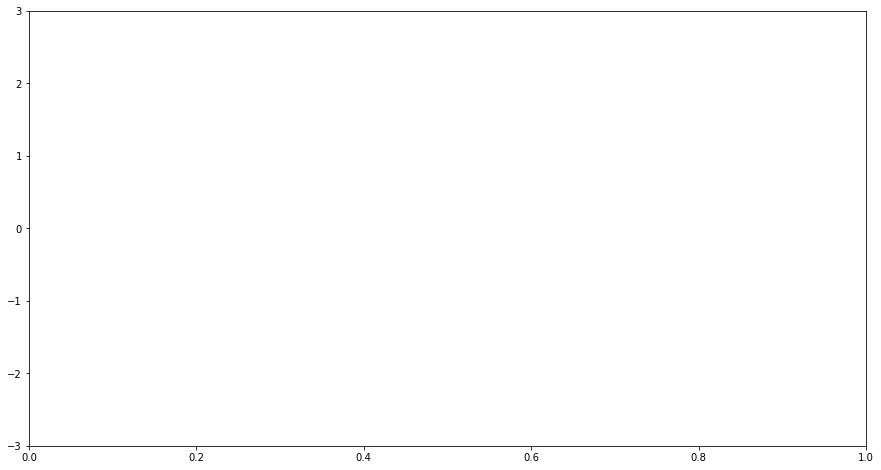

In [254]:
parallel_plot(P[P['CO2'] < -0.5])